<a href="https://colab.research.google.com/github/Ali478/Linear-regression-with-one-variable/blob/main/linear_reg_with_one_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---




# **Single Variable**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt





---



# **Importing data**




In [ ]:
dt = pd.read_csv("ex1data1.txt",header=None)

dt.columns = ["population", "profit"]

In [ ]:
dt.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
#iloc...integer location
# read first column population as input
x = dt.iloc[:,0]
#read second column profit as output
y = dt.iloc[:,1]
#m is number of training examples
m = len(y)




---



# **Visualizing the dataset**

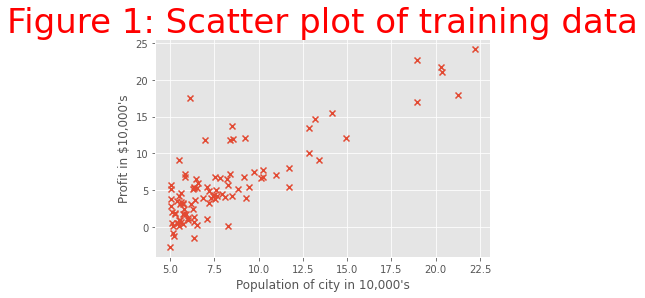

In [ ]:
plt.scatter(x,y, marker='x')
plt.xlabel('Population of city in 10,000\'s')
plt.ylabel('Profit in $10,000\'s')
plt.title("Figure 1: Scatter plot of training data", fontsize = 34, color="red")
plt.show()

In [ ]:
#Increasing the rank of both x and y for operations
x = x[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
#[theta1]
#[theta2]
iterations= 1500
alpha = 0.01
ones = np.ones((m,1))
x = np.hstack((ones,x)) #adding the ones column to x so that x*theta gives the h

/tmp/ipykernel_11096/1868676269.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,np.newaxis]
/tmp/ipykernel_11096/1868676269.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:,np.newaxis]





---


# **Cost function**

In [ ]:
#computing the cost
def computeCost(x,y,theta):
    temp = np.dot(x,theta) - y
    return np.sum(np.power(temp,2))/(2*m)
J = computeCost(x,y,theta)
print(J)

32.072733877455676




---



# **Gradient decent**

In [ ]:
#Finding theta1 and theta2 using gradient descent
def gradientDescent(x,y,theta,alpha,iterations):
    for _ in range(iterations):
        temp = np.dot(x,theta)-y
        temp = np.dot(x.T,temp)
        theta = theta-(alpha/m)*temp
    return theta


In [ ]:
theta = gradientDescent(x,y,theta,alpha,iterations)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


In [ ]:
#compute cost using optimal theta
J = computeCost(x,y,theta)
print(J)

4.483388256587726




---





# **Plotting the best fit line**



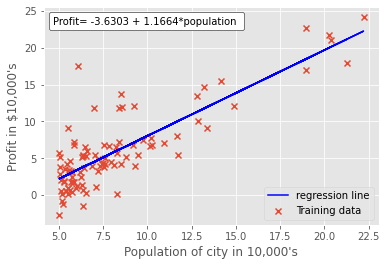

In [ ]:
from matplotlib.offsetbox import AnchoredText
fig, ax = plt.subplots()
at = AnchoredText(
    "Profit= -3.6303 + 1.1664*population ", prop=dict(size=10), frameon=True, loc='upper left')
at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(at)

plt.scatter(x[:,1],y, marker ='x', label= 'Training data')
plt.xlabel('Population of city in 10,000\'s')
plt.ylabel('Profit in $10,000\'s')
plt.plot(x[:,1],np.dot(x,theta), color= 'blue', label='regression line')
plt.legend(loc='lower right')
plt.show()



---

